In [1]:
!pip install pandas scikit-learn

In [2]:
!pip install openpyxl

In [1]:
path_to_folder = 'data_problems.xlsx'

In [2]:
import pandas as pd

In [3]:
data = pd.read_excel(path_to_folder)

data = data[['task', 'topic', 'theory']]

In [4]:
!nvidia-smi

Wed Mar 20 09:16:36 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.14              Driver Version: 550.54.14      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:01:00.0 Off |                  Off |
| N/A   39C    P0             26W /   70W |    9552MiB /  16384MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [5]:
!pip install transformers


In [6]:
import os
import pandas as pd
import numpy as np
import shutil
import sys
import tqdm.notebook as tq
from collections import defaultdict
import warnings
warnings.filterwarnings('ignore')
import torch
import torch.nn as nn

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [7]:
df_data = data

,task,topic,theory
0,Между девятью планетами Солнечной системы введ...,Графы,NaN
1,"В стране Цифра есть 9 городов с названиями 1, ...",Графы,NaN
2,"В государстве 100 городов, и из каждого из них...",Графы,NaN
3,"В классе 30 человек. Может ли быть так, что 9 ...",Графы,NaN
4,В городе Маленьком 15 телефонов. Можно ли их с...,Графы,NaN
...,...,...,...
2130,Дьявол предлагает Человеку сыграть в следующую...,Дирихле,2; 4; 6
2131,По шоссе в одном направлении едут 10 автомобил...,Дирихле,2; 3; 4
2132,В пространстве имеются 30 ненулевых векторов. ...,Дирихле,2; 4; 6
2133,На плоскости даны две точки A и B. Пусть C – н...,Дирихле,2; 4; 6


In [10]:
df_data = df_data.dropna(subset=['theory'])
df_data

,theory,combined,1,2,3,4,5,6,7,8,9,10,11,12
754,1; 2; 3,При каком значении a многочлен P(x) = x1000 +...,0,0,0,0,0,0,0,0,0,0,0,0
755,1; 3,"Докажите, что многочлен P(x) = (x + 1)6 – x6 ...",0,0,0,0,0,0,0,0,0,0,0,0
756,1; 2; 3,При каких a и b многочлен P(x) = (a + b)x5 + ...,0,0,0,0,0,0,0,0,0,0,0,0
757,1; 2; 3,При каких значениях параметра a многочлен P(x...,0,0,0,0,0,0,0,0,0,0,0,0
758,1; 2; 3,При каких a многочлен P(x) = a³x5 + (1 – a)x4...,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2130,2; 4; 6,Дьявол предлагает Человеку сыграть в следующую...,0,0,0,0,0,0,0,0,0,0,0,0
2131,2; 3; 4,По шоссе в одном направлении едут 10 автомобил...,0,0,0,0,0,0,0,0,0,0,0,0
2132,2; 4; 6,В пространстве имеются 30 ненулевых векторов. ...,0,0,0,0,0,0,0,0,0,0,0,0
2133,2; 4; 6,На плоскости даны две точки A и B. Пусть C – н...,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
df_data["combined"] = df_data["task"] + ". " + df_data["topic"]
df_data.drop(columns=["topic", "task"], axis=1, inplace=True)

In [9]:
df_data

,theory,combined
0,NaN,Между девятью планетами Солнечной системы введ...
1,NaN,"В стране Цифра есть 9 городов с названиями 1, ..."
2,NaN,"В государстве 100 городов, и из каждого из них..."
3,NaN,"В классе 30 человек. Может ли быть так, что 9 ..."
4,NaN,В городе Маленьком 15 телефонов. Можно ли их с...
...,...,...
2130,2; 4; 6,Дьявол предлагает Человеку сыграть в следующую...
2131,2; 3; 4,По шоссе в одном направлении едут 10 автомобил...
2132,2; 4; 6,В пространстве имеются 30 ненулевых векторов. ...
2133,2; 4; 6,На плоскости даны две точки A и B. Пусть C – н...


In [10]:
df_data = df_data.dropna(subset=['theory'])

In [11]:
for i in range(1, 13):
  df_data[str(i)] = 0

for i in range(1, 13):
  df_data[str(i)] = df_data.theory.apply(lambda x: int(str(i) in x))

In [12]:
df_data.drop(columns=['theory'], inplace=True)

In [13]:
df_data

,combined,1,2,3,4,5,6,7,8,9,10,11,12
754,При каком значении a многочлен P(x) = x1000 +...,1,1,1,0,0,0,0,0,0,0,0,0
755,"Докажите, что многочлен P(x) = (x + 1)6 – x6 ...",1,0,1,0,0,0,0,0,0,0,0,0
756,При каких a и b многочлен P(x) = (a + b)x5 + ...,1,1,1,0,0,0,0,0,0,0,0,0
757,При каких значениях параметра a многочлен P(x...,1,1,1,0,0,0,0,0,0,0,0,0
758,При каких a многочлен P(x) = a³x5 + (1 – a)x4...,1,1,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2130,Дьявол предлагает Человеку сыграть в следующую...,0,1,0,1,0,1,0,0,0,0,0,0
2131,По шоссе в одном направлении едут 10 автомобил...,0,1,1,1,0,0,0,0,0,0,0,0
2132,В пространстве имеются 30 ненулевых векторов. ...,0,1,0,1,0,1,0,0,0,0,0,0
2133,На плоскости даны две точки A и B. Пусть C – н...,0,1,0,1,0,1,0,0,0,0,0,0


In [14]:
from sklearn.model_selection import train_test_split

# split into train and test
df_train, df_test = train_test_split(df_data, random_state=77, test_size=0.30, shuffle=True)
# split test into test and validation datasets
df_test, df_valid = train_test_split(df_test, random_state=88, test_size=0.50, shuffle=True)

In [15]:
print(f"Train: {df_train.shape}, Test: {df_test.shape}, Valid: {df_valid.shape}")

Train: (964, 13), Test: (207, 13), Valid: (207, 13)


In [16]:
df_cleaned = df_data.dropna()

In [17]:
# split into train and test
df_train, df_test = train_test_split(df_data, random_state=77, test_size=0.30, shuffle=True)
# split test into test and validation datasets
df_test, df_valid = train_test_split(df_test, random_state=88, test_size=0.50, shuffle=True)

In [18]:
print(f"Train: {df_train.shape}, Test: {df_test.shape}, Valid: {df_valid.shape}")

Train: (964, 13), Test: (207, 13), Valid: (207, 13)


In [71]:
# Hyperparameters
MAX_LEN = 256
TRAIN_BATCH_SIZE = 8
VALID_BATCH_SIZE = 8
TEST_BATCH_SIZE = 8
EPOCHS = 20
LEARNING_RATE = 1e-05
THRESHOLD = 0.5 # threshold for the sigmoid

In [20]:
from transformers import BertTokenizer, BertModel

In [21]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [48]:
# Test the tokenizer
test_text = "We are testing BERT tokenizer."
# generate encodings
encodings = tokenizer.encode_plus(test_text,
                                  add_special_tokens = True,
                                  max_length = 50,
                                  truncation = True,
                                  padding = "max_length",
                                  return_attention_mask = True,
                                  return_tensors = "pt")
# we get a dictionary with three keys (see: https://huggingface.co/transformers/glossary.html)
encodings

{'input_ids': tensor([[  101,  2057,  2024,  5604, 14324, 19204, 17629,  1012,   102,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0]])}

In [22]:
df_data

,combined,1,2,3,4,5,6,7,8,9,10,11,12
754,При каком значении a многочлен P(x) = x1000 +...,1,1,1,0,0,0,0,0,0,0,0,0
755,"Докажите, что многочлен P(x) = (x + 1)6 – x6 ...",1,0,1,0,0,0,0,0,0,0,0,0
756,При каких a и b многочлен P(x) = (a + b)x5 + ...,1,1,1,0,0,0,0,0,0,0,0,0
757,При каких значениях параметра a многочлен P(x...,1,1,1,0,0,0,0,0,0,0,0,0
758,При каких a многочлен P(x) = a³x5 + (1 – a)x4...,1,1,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2130,Дьявол предлагает Человеку сыграть в следующую...,0,1,0,1,0,1,0,0,0,0,0,0
2131,По шоссе в одном направлении едут 10 автомобил...,0,1,1,1,0,0,0,0,0,0,0,0
2132,В пространстве имеются 30 ненулевых векторов. ...,0,1,0,1,0,1,0,0,0,0,0,0
2133,На плоскости даны две точки A и B. Пусть C – н...,0,1,0,1,0,1,0,0,0,0,0,0


In [23]:
df_train['combined']

1025    В углы B и C треугольника ABC вписаны две окру...
1922    Совет из 2000 депутатов решил утвердить госуда...
2070    а) Группа людей прошла опрос, состоящий из 20 ...
1612    Даны числа 1, 2, ..., N, каждое из которых окр...
1928    Учитель заполнил клетчатую таблицу 5×5 различн...
                              ...                        
1684     На шахматную доску произвольным образом уложи...
2074    В Академии Наук 999 академиков. Каждая научная...
990     Дан квадратный трёхчлен  f(x) = x² + ax + b.  ...
1363    В почтовом отделении продаются открытки 10 вид...
1484    Докажите, что \n   а)  241 + 1  делится на 83;...
Name: combined, Length: 964, dtype: object

In [24]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, df, tokenizer, max_len, target_list):
        self.tokenizer = tokenizer
        self.df = df
        self.title = list(df['combined'])
        self.targets = self.df[target_list].values
        self.max_len = max_len

    def __len__(self):
        return len(self.title)

    def __getitem__(self, index):
        title = str(self.title[index])
        title = " ".join(title.split())
        inputs = self.tokenizer.encode_plus(
            title,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            return_token_type_ids=True,
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )а
        return {
            'input_ids': inputs['input_ids'].flatten(),
            'attention_mask': inputs['attention_mask'].flatten(),
            'token_type_ids': inputs["token_type_ids"].flatten(),
            'targets': torch.FloatTensor(self.targets[index]),
            'title': title
        }


In [25]:
target_list = list(df_train.columns)
target_list

['combined', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']

In [26]:
target_list = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']

In [27]:
train_dataset = CustomDataset(df_train, tokenizer, MAX_LEN, target_list)
valid_dataset = CustomDataset(df_valid, tokenizer, MAX_LEN, target_list)
test_dataset = CustomDataset(df_test, tokenizer, MAX_LEN, target_list)

In [28]:
train_dataset = CustomDataset(df_train, tokenizer, MAX_LEN, target_list)
train_dataset

In [53]:
df_train.dtypes

theory      object
combined    object
1            int64
2            int64
3            int64
4            int64
5            int64
6            int64
7            int64
8            int64
9            int64
10           int64
11           int64
12           int64
dtype: object

In [29]:
df_train.combined.iloc[0]

'В углы B и C треугольника ABC вписаны две окружности \nрадиусов 2 и 3, касающиеся биссектрисы угла A треугольника. \nНайдите эту биссектрису, если расстояние между точками, в которых окружности касаются BC, равно 7. . Многочлен'

In [30]:
# testing the dataset
next(iter(train_dataset))

{'input_ids': tensor([  101,  1182,  1198, 29741, 29436, 29113,  1038,  1188,  1039,  1197,
         16856, 15290, 29748, 29741, 14150, 29436, 23742, 18947, 10325, 28598,
          5925,  1182, 29746, 10325, 29747, 28995, 29113,  1184, 25529, 15290,
          1193, 23925, 16856, 29748, 29743, 18947, 14150, 29747, 22919, 10325,
          1195, 10260, 29742, 10325, 29748, 29747, 19259,  1016,  1188,  1017,
          1010,  1189, 10260, 29747, 10260, 29757, 29754, 10325, 15290, 29747,
         17432,  1181, 10325, 29747, 29747, 15290, 23925, 22919, 16856, 10325,
         29747, 29113,  1198, 29741, 29436, 10260,  1037,  1197, 16856, 15290,
         29748, 29741, 14150, 29436, 23742, 18947, 10325, 28598,  1012,  1192,
         10260, 10325, 29742, 10325, 22919, 15290,  1208, 22919, 29748,  1181,
         10325, 29747, 29747, 15290, 23925, 22919, 16856, 10325, 29747, 29748,
          1010,  1185, 29747, 29436, 10325,  1195, 10260, 29747, 29747, 22919,
         14150, 17432, 18947, 10325, 15

In [31]:
# Data loaders
train_data_loader = torch.utils.data.DataLoader(train_dataset,
    batch_size=TRAIN_BATCH_SIZE,
    shuffle=True,
    num_workers=0
)

val_data_loader = torch.utils.data.DataLoader(valid_dataset,
    batch_size=VALID_BATCH_SIZE,
    shuffle=False,
    num_workers=0
)

test_data_loader = torch.utils.data.DataLoader(test_dataset,
    batch_size=TEST_BATCH_SIZE,
    shuffle=False,
    num_workers=0
)

In [40]:
class BERTClass(torch.nn.Module):
    def __init__(self):
        super(BERTClass, self).__init__()
        self.bert_model = BertModel.from_pretrained('bert-base-uncased', return_dict=True)
        self.dropout = torch.nn.Dropout(0.3)
        self.linear = torch.nn.Linear(768, 12)

    def forward(self, input_ids, attn_mask, token_type_ids):
        output = self.bert_model(
            input_ids,
            attention_mask=attn_mask,
            token_type_ids=token_type_ids
        )
        output_dropout = self.dropout(output.pooler_output)
        output = self.linear(output_dropout)
        return output

model = BERTClass()

# # Freezing BERT layers: (tested, weaker convergence)
# for param in model.bert_model.parameters():
#     param.requires_grad = False

model.to(device)

BERTClass(
  (bert_model): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_a

In [41]:
def loss_fn(outputs, targets):
    return torch.nn.BCEWithLogitsLoss()(outputs, targets)

In [42]:
from transformers import AdamW

# define the optimizer
optimizer = AdamW(model.parameters(), lr = 1e-5)

In [67]:
def train_model(training_loader, model, optimizer):
    losses = []
    correct_predictions = 0
    num_samples = 0
    f1_scores = []
    # set model to training mode (activate droput, batch norm)
    model.train()
    # initialize the progress bar
    loop = tq.tqdm(enumerate(training_loader), total=len(training_loader),
                      leave=True, colour='steelblue')
    for batch_idx, data in loop:
        ids = data['input_ids'].to(device, dtype = torch.long)
        mask = data['attention_mask'].to(device, dtype = torch.long)
        token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
        targets = data['targets'].to(device, dtype = torch.float)

        # forward
        outputs = model(ids, mask, token_type_ids) # (batch,predict)=(32,8)
        loss = loss_fn(outputs, targets)
        losses.append(loss.item())
        # training accuracy, apply sigmoid, round (apply thresh 0.5)
        outputs = torch.sigmoid(outputs).cpu().detach().numpy().round()
        targets = targets.cpu().detach().numpy()
        correct_predictions += np.sum(outputs==targets)
        num_samples += targets.size   # total number of elements in the 2D array
        
        # F1 score
        f1 = f1_score(targets.flatten(), outputs.flatten())
        f1_scores.append(f1)

        # backward
        optimizer.zero_grad()
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        # grad descent step
        optimizer.step()

        # Update progress bar
        #loop.set_description(f"")
        #loop.set_postfix(batch_loss=loss)

    # returning: trained model, model accuracy, mean loss
    return model, float(correct_predictions)/num_samples, np.mean(losses), np.mean(f1_scores)

In [65]:
from sklearn.metrics import f1_score

In [66]:
def eval_model(validation_loader, model, optimizer):
    losses = []
    correct_predictions = 0
    num_samples = 0
    f1_scores = []

    # set model to eval mode (turn off dropout, fix batch norm)
    model.eval()

    with torch.no_grad():
        for batch_idx, data in enumerate(validation_loader, 0):
            ids = data['input_ids'].to(device, dtype=torch.long)
            mask = data['attention_mask'].to(device, dtype=torch.long)
            token_type_ids = data['token_type_ids'].to(device, dtype=torch.long)
            targets = data['targets'].to(device, dtype=torch.float)
            outputs = model(ids, mask, token_type_ids)

            loss = loss_fn(outputs, targets)
            losses.append(loss.item())

            # validation accuracy
            outputs = torch.sigmoid(outputs).cpu().detach().numpy().round()
            targets = targets.cpu().detach().numpy()
            correct_predictions += np.sum(outputs == targets)
            num_samples += targets.size   # total number of elements in the 2D array
            
            # F1 score
            f1 = f1_score(targets.flatten(), outputs.flatten())
            f1_scores.append(f1)

    return float(correct_predictions) / num_samples, np.mean(losses), np.mean(f1_scores)


In [45]:
from collections import defaultdict

In [46]:
df_data

,combined,1,2,3,4,5,6,7,8,9,10,11,12
754,При каком значении a многочлен P(x) = x1000 +...,1,1,1,0,0,0,0,0,0,0,0,0
755,"Докажите, что многочлен P(x) = (x + 1)6 – x6 ...",1,0,1,0,0,0,0,0,0,0,0,0
756,При каких a и b многочлен P(x) = (a + b)x5 + ...,1,1,1,0,0,0,0,0,0,0,0,0
757,При каких значениях параметра a многочлен P(x...,1,1,1,0,0,0,0,0,0,0,0,0
758,При каких a многочлен P(x) = a³x5 + (1 – a)x4...,1,1,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2130,Дьявол предлагает Человеку сыграть в следующую...,0,1,0,1,0,1,0,0,0,0,0,0
2131,По шоссе в одном направлении едут 10 автомобил...,0,1,1,1,0,0,0,0,0,0,0,0
2132,В пространстве имеются 30 ненулевых векторов. ...,0,1,0,1,0,1,0,0,0,0,0,0
2133,На плоскости даны две точки A и B. Пусть C – н...,0,1,0,1,0,1,0,0,0,0,0,0


In [64]:
!pip install ipywidgets --upgrade

In [65]:
!jupyter labextension install @jupyter-widgets/jupyterlab-manager


(Deprecated) Installing extensions with the jupyter labextension install command is now deprecated and will be removed in a future major version of JupyterLab.

Users should manage prebuilt extensions with package managers like pip and conda, and extension authors are encouraged to distribute their extensions as prebuilt packages 
/usr/local/lib/python3.10/dist-packages/jupyterlab/debuglog.py:56: UserWarning: An error occurred.
  warnings.warn("An error occurred.")
/usr/local/lib/python3.10/dist-packages/jupyterlab/debuglog.py:57: UserWarning: ValueError: Please install nodejs >=18.0.0 before continuing. nodejs may be installed using conda or directly from the nodejs website.
  warnings.warn(msg[-1].strip())
/usr/local/lib/python3.10/dist-packages/jupyterlab/debuglog.py:58: UserWarning: See the log file for details: /tmp/jupyterlab-debug-4l5mo84o.log
  warnings.warn(f"See the log file for details: {log_path!s}")


In [72]:
history = defaultdict(list)
best_accuracy = 0
best_f1 = 0

for epoch in range(1, EPOCHS+1):
    print(f'Epoch {epoch}/{EPOCHS}')
    model, train_acc, train_loss, train_f1 = train_model(train_data_loader, model, optimizer)
    val_acc, val_loss, val_f1 = eval_model(val_data_loader, model, optimizer)

    print(f'train_loss={train_loss:.4f}, val_loss={val_loss:.4f} train_acc={train_acc:.4f}, val_loss={val_loss:.4f} train_f1={train_f1:.4f}, val_acc={val_acc:.4f}, val_f1={val_f1:.4f}')

    history['train_acc'].append(train_acc)
    history['train_f1'].append(train_f1)
    history['train_loss'].append(train_loss)
    
    history['val_acc'].append(val_acc)
    history['val_f1'].append(val_f1)
    history['val_loss'].append(val_loss)
    # save the best model
    if val_acc > best_accuracy:
        torch.save(model.state_dict(), os.path.join("Bert_tune","output","MLTC_model_state.bin"))
        best_accuracy = val_acc
    if val_f1 > best_f1:
        best_f1 = val_f1

Epoch 1/20


  0%|          | 0/121 [00:00<?, ?it/s]

train_loss=0.0690, val_loss=0.5840 train_acc=0.9838, val_loss=0.5840 train_f1=0.9682, val_acc=0.8120, val_f1=0.6079
Epoch 2/20


  0%|          | 0/121 [00:00<?, ?it/s]

train_loss=0.0667, val_loss=0.6124 train_acc=0.9866, val_loss=0.6124 train_f1=0.9731, val_acc=0.8088, val_f1=0.6027
Epoch 3/20


  0%|          | 0/121 [00:00<?, ?it/s]

train_loss=0.0597, val_loss=0.5954 train_acc=0.9866, val_loss=0.5954 train_f1=0.9741, val_acc=0.8140, val_f1=0.6076
Epoch 4/20


  0%|          | 0/121 [00:00<?, ?it/s]

train_loss=0.0591, val_loss=0.5861 train_acc=0.9869, val_loss=0.5861 train_f1=0.9738, val_acc=0.8164, val_f1=0.6199
Epoch 5/20


  0%|          | 0/121 [00:00<?, ?it/s]

train_loss=0.0549, val_loss=0.6115 train_acc=0.9888, val_loss=0.6115 train_f1=0.9775, val_acc=0.8124, val_f1=0.6019
Epoch 6/20


  0%|          | 0/121 [00:00<?, ?it/s]

train_loss=0.0519, val_loss=0.6213 train_acc=0.9884, val_loss=0.6213 train_f1=0.9771, val_acc=0.8144, val_f1=0.6190
Epoch 7/20


  0%|          | 0/121 [00:00<?, ?it/s]

train_loss=0.0483, val_loss=0.6473 train_acc=0.9893, val_loss=0.6473 train_f1=0.9793, val_acc=0.8164, val_f1=0.6178
Epoch 8/20


  0%|          | 0/121 [00:00<?, ?it/s]

train_loss=0.0471, val_loss=0.6544 train_acc=0.9901, val_loss=0.6544 train_f1=0.9805, val_acc=0.8140, val_f1=0.6109
Epoch 9/20


  0%|          | 0/121 [00:00<?, ?it/s]

train_loss=0.0442, val_loss=0.6603 train_acc=0.9908, val_loss=0.6603 train_f1=0.9821, val_acc=0.8168, val_f1=0.6170
Epoch 10/20


  0%|          | 0/121 [00:00<?, ?it/s]

train_loss=0.0412, val_loss=0.6492 train_acc=0.9912, val_loss=0.6492 train_f1=0.9821, val_acc=0.8148, val_f1=0.6178
Epoch 11/20


  0%|          | 0/121 [00:00<?, ?it/s]

train_loss=0.0387, val_loss=0.6791 train_acc=0.9919, val_loss=0.6791 train_f1=0.9837, val_acc=0.8104, val_f1=0.6044
Epoch 12/20


  0%|          | 0/121 [00:00<?, ?it/s]

train_loss=0.0366, val_loss=0.7052 train_acc=0.9923, val_loss=0.7052 train_f1=0.9847, val_acc=0.8080, val_f1=0.6033
Epoch 13/20


  0%|          | 0/121 [00:00<?, ?it/s]

train_loss=0.0344, val_loss=0.7195 train_acc=0.9941, val_loss=0.7195 train_f1=0.9883, val_acc=0.8056, val_f1=0.6087
Epoch 14/20


  0%|          | 0/121 [00:00<?, ?it/s]

train_loss=0.0337, val_loss=0.6917 train_acc=0.9933, val_loss=0.6917 train_f1=0.9870, val_acc=0.8132, val_f1=0.6155
Epoch 15/20


  0%|          | 0/121 [00:00<?, ?it/s]

train_loss=0.0308, val_loss=0.6958 train_acc=0.9946, val_loss=0.6958 train_f1=0.9894, val_acc=0.8064, val_f1=0.6012
Epoch 16/20


  0%|          | 0/121 [00:00<?, ?it/s]

train_loss=0.0294, val_loss=0.7077 train_acc=0.9952, val_loss=0.7077 train_f1=0.9909, val_acc=0.8072, val_f1=0.6054
Epoch 17/20


  0%|          | 0/121 [00:00<?, ?it/s]

train_loss=0.0284, val_loss=0.7188 train_acc=0.9948, val_loss=0.7188 train_f1=0.9894, val_acc=0.8136, val_f1=0.6139
Epoch 18/20


  0%|          | 0/121 [00:00<?, ?it/s]

train_loss=0.0255, val_loss=0.7519 train_acc=0.9954, val_loss=0.7519 train_f1=0.9913, val_acc=0.8120, val_f1=0.6026
Epoch 19/20


  0%|          | 0/121 [00:00<?, ?it/s]

train_loss=0.0255, val_loss=0.7130 train_acc=0.9952, val_loss=0.7130 train_f1=0.9908, val_acc=0.8164, val_f1=0.6200
Epoch 20/20


  0%|          | 0/121 [00:00<?, ?it/s]

train_loss=0.0257, val_loss=0.7460 train_acc=0.9946, val_loss=0.7460 train_f1=0.9893, val_acc=0.8104, val_f1=0.6032


In [70]:
import matplotlib.pyplot as plt

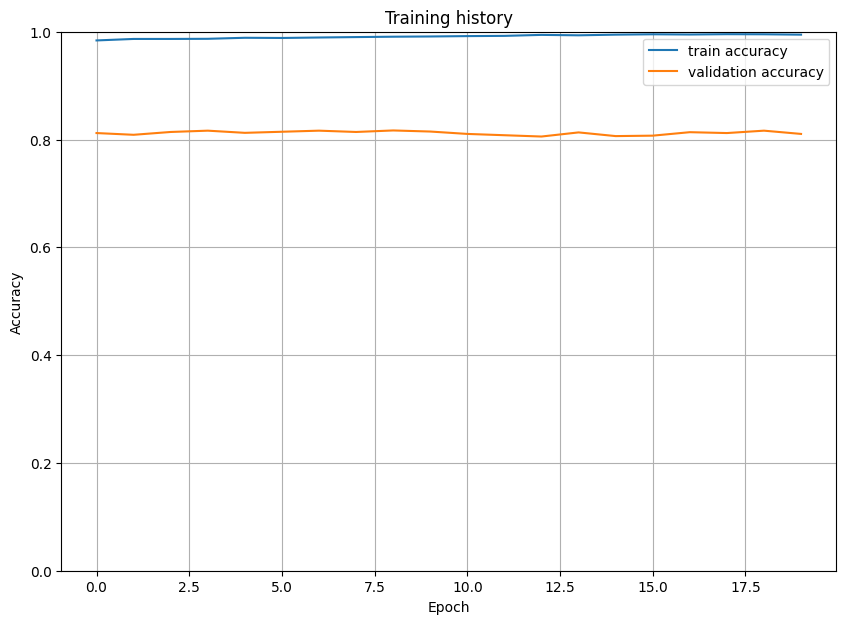

In [73]:
plt.rcParams["figure.figsize"] = (10,7)
plt.plot(history['train_acc'], label='train accuracy')
plt.plot(history['val_acc'], label='validation accuracy')
plt.title('Training history')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.ylim([0, 1]);
plt.grid()

In [75]:
# Loading pretrained model (best model)
model = BERTClass()
model.load_state_dict(torch.load(os.path.join("Bert_tune","output","MLTC_model_state.bin")))
model = model.to(device)

In [83]:
# Evaluate the model using the test data
test_acc, test_loss, test_f1 = eval_model(test_data_loader, model, optimizer)

In [84]:
# The accuracy looks OK, similar to the validation accuracy
# The model generalizes well !
test_acc

0.8059581320450886

In [85]:
from sklearn.metrics import confusion_matrix, classification_report

def get_predictions(model, data_loader):
    """
    Outputs:
      predictions - 
    """
    model = model.eval()
    
    titles = []
    predictions = []
    prediction_probs = []
    target_values = []

    with torch.no_grad():
      for data in data_loader:
        title = data["title"]
        ids = data["input_ids"].to(device, dtype = torch.long)
        mask = data["attention_mask"].to(device, dtype = torch.long)
        token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
        targets = data["targets"].to(device, dtype = torch.float)
        
        outputs = model(ids, mask, token_type_ids)
        # add sigmoid, for the training sigmoid is in BCEWithLogitsLoss
        outputs = torch.sigmoid(outputs).detach().cpu()
        # thresholding at 0.5
        preds = outputs.round()
        targets = targets.detach().cpu()

        titles.extend(title)
        predictions.extend(preds)
        prediction_probs.extend(outputs)
        target_values.extend(targets)
    
    predictions = torch.stack(predictions)
    prediction_probs = torch.stack(prediction_probs)
    target_values = torch.stack(target_values)
    
    return titles, predictions, prediction_probs, target_values

In [86]:
titles, predictions, prediction_probs, target_values = get_predictions(model, test_data_loader)

# sanity check
predictions.numpy()

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [87]:
print(f"titles:{len(titles)} \npredictions:{predictions.shape} \nprediction_probs:{prediction_probs.shape} \ntarget_values:{target_values.shape}")

titles:207 
predictions:torch.Size([207, 12]) 
prediction_probs:torch.Size([207, 12]) 
target_values:torch.Size([207, 12])


In [88]:

# Generate Classification Metrics
#
# note that the total support is greater than the number of samples
# some samples have multiple lables

print(classification_report(target_values, predictions, target_names=target_list))

              precision    recall  f1-score   support

           1       0.65      0.66      0.65        50
           2       0.62      0.55      0.58        87
           3       0.63      0.60      0.62        91
           4       0.75      0.69      0.72       104
           5       0.49      0.37      0.42        73
           6       0.41      0.29      0.34        66
           7       0.74      0.72      0.73        87
           8       0.62      0.62      0.62        64
           9       0.00      0.00      0.00         6
          10       0.67      0.40      0.50         5
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0

   micro avg       0.63      0.57      0.60       633
   macro avg       0.47      0.41      0.43       633
weighted avg       0.62      0.57      0.59       633
 samples avg       0.65      0.59      0.60       633



In [104]:
# raw text
raw_text = "Гриша написал на доске натуральные числа от 1 до 99. Паша выбрал 𝑛 из них и выписал их в строку так, чтобы разность любых двух соседних была не меньше 50. При каком наибольшем 𝑛 это возможно?"

In [91]:
import warnings

In [92]:
warnings.filterwarnings('ignore')

In [105]:

encoded_text = tokenizer.encode_plus(
    raw_text,
    max_length=MAX_LEN,
    add_special_tokens=True,
    return_token_type_ids=True,
    pad_to_max_length=True,
    return_attention_mask=True,
    return_tensors='pt',
)

In [106]:
input_ids = encoded_text['input_ids'].to(device)

attention_mask = encoded_text['attention_mask'].to(device)
token_type_ids = encoded_text['token_type_ids'].to(device)

output = model(input_ids, attention_mask, token_type_ids)

 # add sigmoid, for the training sigmoid is in BCEWithLogitsLoss
output = torch.sigmoid(output).detach().cpu()

# thresholding at 0.5
output = output.flatten().round().numpy()
output

array([1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [107]:
# Correctly identified the topic of the paper: High energy physics
print(f"Title: {raw_text}")
for idx, p in enumerate(output):
  if p==1:
    print(f"Label: {target_list[idx]}")

Title: Гриша написал на доске натуральные числа от 1 до 99. Паша выбрал 𝑛 из них и выписал их в строку так, чтобы разность любых двух соседних была не меньше 50. При каком наибольшем 𝑛 это возможно?
Label: 1
Label: 2
Label: 4
